In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import calendar
from datetime import datetime

In [2]:
# Define variables for all the items that the model will use (everything in the user_total.json) -- query all of these fields from the database
# and store in variables

In [3]:
# Query all individual receipts for the graph (this should show date of purchase and add the current receipt to the overall total 
# and plot current_total += new_receipt_total) -- anytime current total updates add point to graph

In [4]:
def predict_monthly_spending(total, date_range, recurring_total):
    
    with open('random_forest_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('model_features.pkl', 'rb') as f:
        features = pickle.load(f)

    data_dict = {
        'total': total,
        'date_range': date_range,
        'recurring_total': recurring_total,
    }
    X_new = pd.DataFrame([data_dict], columns=features)
    prediction = model.predict(X_new)[0]
    
    return prediction

In [5]:
# Feed user_total.json into trained model -> will be parameters in the model

In [6]:
# model -> single number reflecting projected monthly spending

In [7]:
# plot number above on day 30 or 31 depending on the month and make dashed line connecting them

In [8]:
def plot_user_spending(prediction, daily_spending, purchase_dates, export_path='spending_projection.png'):
    print(f"Predicted projected monthly spending: ${prediction:.2f}")
    
    # Calculate cumulative spending
    cumulative_spending = np.cumsum(daily_spending)
    days_so_far = len(daily_spending)

    # Get number of days in the month from the first purchase date
    first_date = datetime.strptime(purchase_dates[0], '%Y-%m-%d')
    _, total_days_in_month = calendar.monthrange(first_date.year, first_date.month)

    # Create plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, days_so_far + 1), cumulative_spending, 'o', label='Actual Spending', color='darkgreen')

    # Projected dotted line
    future_days = [days_so_far, total_days_in_month]
    future_spending = [cumulative_spending[-1], prediction]
    plt.plot(future_days, future_spending, '--', label='Predicted Spending', color='darkgreen')

    # Set the labels
    plt.xlabel("Day of the Month")
    plt.ylabel("Total Spent ($)")
    plt.title(f"Estimated Month Projection (Predicted: ${prediction:.2f})")
    plt.xlim(1, total_days_in_month)
    plt.ylim(bottom=0)
    plt.xlim(1, total_days_in_month)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plt.tight_layout()
    plt.savefig(export_path)
    plt.show()

In [9]:
# tell andrea and carolina -> note only display once 4 non recurring receipts have been populated for the month
# otherwise blur out graph with note to add x more receipts to unlock porojected spending

Predicted projected monthly spending: $1847.61


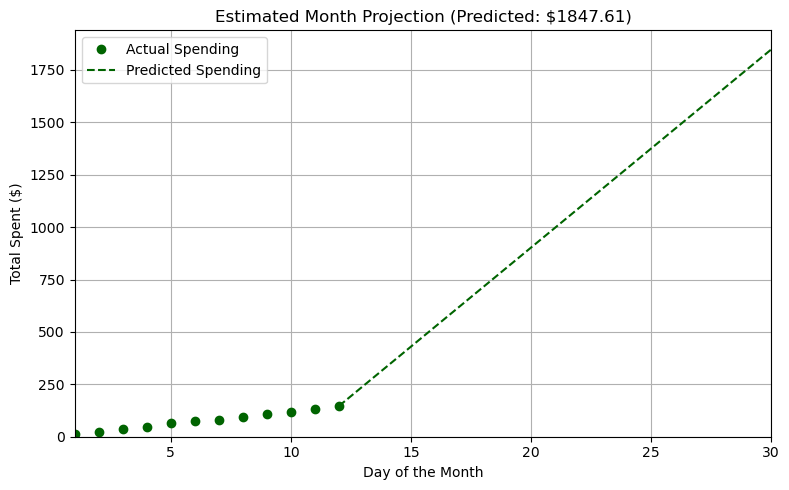

In [10]:
# # This is just a hard coded example of using the functions
# # The data needs to be queried and passed in as parameters to the functions!!

# total = 900
# date_range = 29
# recurring_total = 400
# daily_spending = [15.2, 8.7, 12.4, 10.1, 18.3, 9.0, 7.5, 11.2, 16.5, 10.0, 13.1, 14.4]
# purchase_dates = ['2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-05', '2025-04-06', 
#                   '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-12']

# # call model to make prediction
# prediction = predict_monthly_spending(total, date_range, recurring_total)

# # generate graph based on model
# plot_user_spending(prediction, daily_spending, purchase_dates)
